In [1]:
import numpy as np
import math
from matplotlib import pyplot as plt
import time
import scipy.stats
import pandas as pd
import random

## Simulate from Class

In [2]:
x = np.genfromtxt('data/input.csv', delimiter=',')
x.shape

(20000, 9)

In [3]:
simulation = np.genfromtxt('data/output.csv', delimiter=',')
simulation.shape

(20000,)

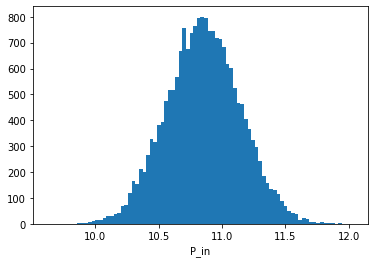

In [4]:
# Plot historgram
plt.hist(simulation, bins = 'auto')
plt.xlabel('P_in')
plt.show()

## Model Selection Methods

### Chi-Square

In [5]:
from helper_functions import compute_chi_square

results = compute_chi_square(simulation)

Distribution: weibull_min || Parameters: (689735610.8989758, -344768410.46437216, 344768421.4037058)
Distribution: norm || Parameters: (10.853921155628283, 0.2919023720919819)
Distribution: weibull_max || Parameters: (4.492407770238895, 12.039806792321933, 1.2980483679989983)
Distribution: beta || Parameters: (349.5938840225746, 411.5919649768779, 3.4268665607784867, 16.171246380337728)
Distribution: invgauss || Parameters: (0.016859003350356505, 8.52795458058047, 137.6908553556142)
Distribution: uniform || Parameters: (9.629764772420614, 2.4015414814156433)
Distribution: gamma || Parameters: (28653.499825745916, -38.55739973585564, 0.0017244427794814387)
Distribution: expon || Parameters: (9.629764772420614, 1.224156383207669)
Distribution: lognorm || Parameters: (0.010673848310671155, -16.468103797463236, 27.32002828159375)
Distribution: pearson3 || Parameters: (0.011952495611501386, 10.853922173798182, 0.2918999931240201)
Distribution: triang || Parameters: (0.5145410846230908, 9.62

In [6]:
results

,Distribution,Log_likelihood,Chi_square,Parameters
1,norm,-3752.053169,1.0,"(10.853921155628283, 0.2919023720919819)"
3,beta,-3751.792991,1.0,"(349.5938840225746, 411.5919649768779, 3.42686..."
6,gamma,-3751.819141,1.0,"(28653.499825745916, -38.55739973585564, 0.001..."
9,pearson3,-3751.819143,1.0,"(0.011952495611501386, 10.853922173798182, 0.2..."
8,lognorm,-3752.537838,3.0,"(0.010673848310671155, -16.468103797463236, 27..."
2,weibull_max,-3865.382946,66.0,"(4.492407770238895, 12.039806792321933, 1.2980..."
4,invgauss,-3998.415358,211.0,"(0.016859003350356505, 8.52795458058047, 137.6..."
10,triang,-8403.241467,7003.0,"(0.5145410846230908, 9.629576619829773, 2.4035..."
0,weibull_min,-9548.723538,8578.0,"(689735610.8989758, -344768410.46437216, 34476..."
5,uniform,-17522.216302,21509.0,"(9.629764772420614, 2.4015414814156433)"


### Plots

In [16]:
import seaborn as sns
simulation.sort()

In [7]:
params_gamma = results.iloc[2]['Parameters']
params_beta = results.iloc[1]['Parameters']
params_normal = results.iloc[0]['Parameters']
params_uniform = results.iloc[9]['Parameters']
params_lognorm = results.iloc[4]['Parameters']

**Normal plot**

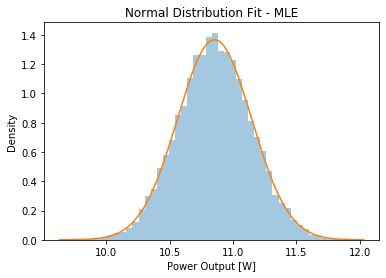

In [21]:
norm_fit = sns.distplot(a = simulation, kde = False, norm_hist=True, axlabel='Power Output [W]')
plt.plot(simulation, scipy.stats.norm.pdf(simulation, *params_normal))
norm_fit.set_title('Normal Distribution Fit - MLE')
norm_fit.set_ylabel('Density')
plt.savefig('Data/Plots/MLE_Normal.png')

**Gamma plot**

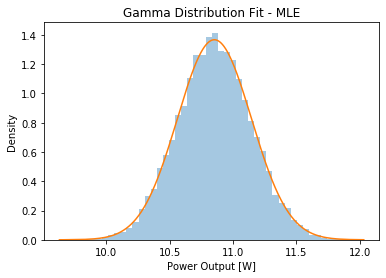

In [18]:
gamma_fit = sns.distplot(a = simulation, kde = False, norm_hist=True, axlabel='Power Output [W]')
plt.plot(simulation, scipy.stats.gamma.pdf(simulation, *params_gamma))
gamma_fit.set_title('Gamma Distribution Fit - MLE')
gamma_fit.set_ylabel('Density')
plt.savefig('Data/Plots/MLE_Gamma.png')

**Beta plot**

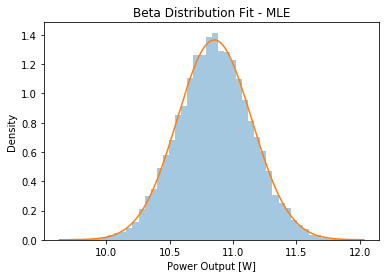

In [20]:
beta_fit = sns.distplot(a = simulation, kde = False, norm_hist=True, axlabel='Power Output [W]')
plt.plot(simulation, scipy.stats.beta.pdf(simulation, *params_beta))
beta_fit.set_title('Beta Distribution Fit - MLE')
beta_fit.set_ylabel('Density')
plt.savefig('Data/Plots/MLE_Beta.png')

**Uniform plot**

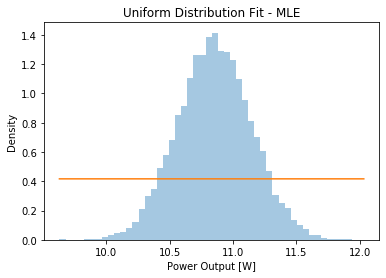

In [22]:
uniform_fit = sns.distplot(a = simulation, kde = False, norm_hist=True, axlabel='Power Output [W]')
plt.plot(simulation, scipy.stats.uniform.pdf(simulation, *params_uniform))
uniform_fit.set_title('Uniform Distribution Fit - MLE')
uniform_fit.set_ylabel('Density')
plt.savefig('Data/Plots/MLE_Uniform.png')

**Lognormal plot**

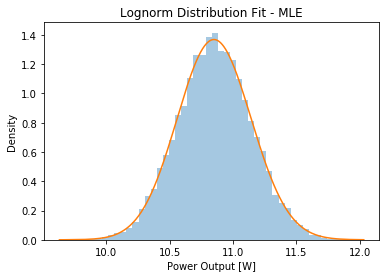

In [23]:
lognorm_fit = sns.distplot(a = simulation, kde = False, norm_hist=True, axlabel='Power Output [W]')
plt.plot(simulation, scipy.stats.lognorm.pdf(simulation, *params_lognorm))
lognorm_fit.set_title('Lognorm Distribution Fit - MLE')
lognorm_fit.set_ylabel('Density')
plt.savefig('Data/Plots/MLE_Lognorm.png')

**Model A:** Normal Distribution

**Model B:** Beta Distribution

### Non-Nested Likelihood Ratio Test

Compare **Model A** to **Model B** and choose the best fit. 

from helper_functions import LRT

Q, qQi = LRT(results.iloc[:2], 1000, n_simulation)
if Q < qQi: print('Select model A')

### Q-Q Plot

Compare **Model A** to **Model B** on a quantile-quantile plot. 

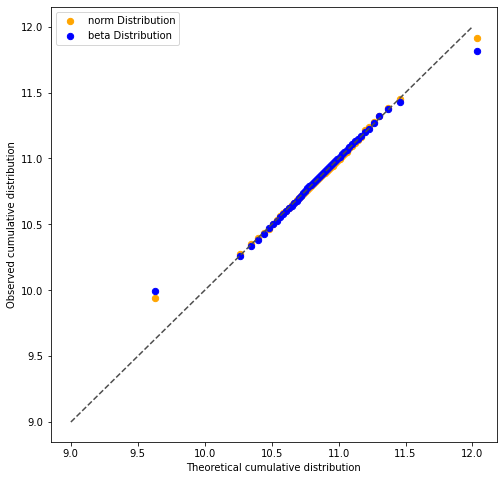

In [7]:
from helper_functions import qqplot

qqplot(simulation, results)

### Chosen Model Description

In [8]:
best_name = results.iloc[0]['Distribution']
best_params = results.iloc[0]['Parameters']

best_dist = getattr(scipy.stats, best_name)

## Plot Choosen Model Againts Data

In [9]:
import seaborn as sns

**Simulated Data Histogram**

C:\Users\oriol.garrobe\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

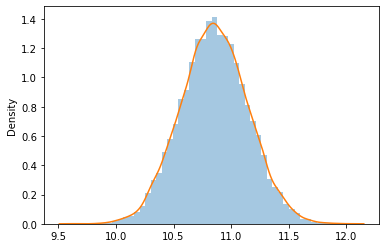

In [10]:
sns.distplot(a = simulation, kde = False, norm_hist=True)
sns.kdeplot(data = simulation, shade= False)

**Chosen Distribution Density Function**

In [11]:
simulation.sort()

**Chosen Distribution on top of Simulated Data Histogram**

C:\Users\oriol.garrobe\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


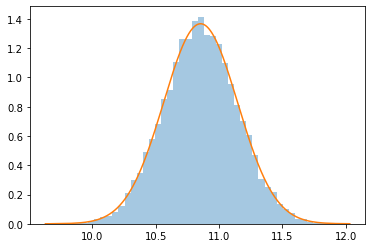

In [13]:
sns.distplot(a = simulation, kde = False, norm_hist=True)
plt.plot(simulation, best_dist.pdf(simulation, *best_params))

C:\Users\oriol.garrobe\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


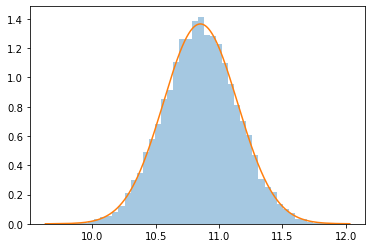

In [24]:
beta_name = results.iloc[1]['Distribution']
beta_params = results.iloc[1]['Parameters']

beta_dist = getattr(scipy.stats, beta_name)

sns.distplot(a = simulation, kde = False, norm_hist=True)
plt.plot(simulation, beta_dist.pdf(simulation, *beta_params))

## Validation Methods

### Kolmogorov-Smirnoff 2 Sample Test

In [14]:
from scipy.stats import ks_2samp

In [16]:
data2 = best_dist.rvs(*best_params, size = 2000)
statistic, pvalue = ks_2samp(data,data2)
print(f"The Statistic value is: {statistic} \nThe p_value is: {pvalue}")

NameError: name 'data' is not defined

In [ ]:
n1 = len(data1)
n2 = len(data2)
alpha = 0.05
c_alpha = 1.36 # https://sparky.rice.edu//astr360/kstest.pdf
critical_value = c_alpha * ((n1 + n2)/(n1*n2))**0.5 
critical_value

In [ ]:
if statistic > critical_value:
    print('The two samples come from different distributions')
else:
    print('The two samples come from same distributions')

## Work Within Limits

### Quantiles

In [17]:
quantiles = best_dist.ppf([0.0001, 0.5, 0.9999], *best_params)
quantiles

array([ 9.76833142, 10.85392116, 11.93951089])

**Improvement**

In [43]:
limit_min = model.P_in()[0]
limit_MAX = model.P_in()[2] 
print(f'min: {limit_min}\nMax: {limit_MAX}\n')
(limit_MAX-limit_min)/limit_MAX
percent = ((quantiles[2]-quantiles[0])-(quantiles[2]-quantiles[1]))/limit_MAX*100

print(f'{percent}% narrower')

min: 9.285923059194744
Max: 12.669757924403362

8.568354189804463% narrower


### Cp

In [20]:
# Tolerances of electronic components
# Used to initialize the class
from PSU_class import PSU

Vout = np.array([3.2, 3.3, 3.4])
LS_Ron = np.array([6.3, 8.3, 11])*1e-3
Iout = np.array([2.64, 3.03, 3.45])
Vin = np.array([13.3, 13.35, 13.37])
Fsw = np.array([430, 455, 489])*1e3
Vbody_diode = np.array([0.65, 0.8, 1.2])
L = np.array([5.4, 4.5, 3.6])*1e-6
DCR = np.array([12.61, 19, 27.23])*1e-3
P_IC = np.array([83.93, 88.81, 93.69])*1e-3

model = PSU(Vout, LS_Ron, Iout, Vin, Fsw, Vbody_diode, L, DCR, P_IC)

In [21]:
# This value depends on the best distribution
sigma = best_params[1]

In [22]:
limit_min = model.P_in()[0]
limit_MAX = model.P_in()[2] 
Cp = (limit_MAX - limit_min)/(6 * sigma)
Cp

1.9320585629124496